# Khipus.ai
## Neural Network from Scratch
### Assignment 4: Binary Image Classification (dogs vs. cats) with PyTorch 
### Name: (add your name)
<span>© Copyright Notice 2025, Khipus.ai - All Rights Reserved.</span>
---
This notebook demonstrates building and training a convolutional neural network using PyTorch for binary classification of images (dogs vs. cats). It includes data preprocessing, training, evaluation (with accuracy and confusion matrix), and making predictions on new images.

### Taks
1. Execute all cells on the notebook
2. Response the following questions

What learning rate is set for the SGD optimizer?

Answer: The learning rate is set to 0.001.

What momentum value is used in the optimizer?

Answer: The momentum is set to 0.9.

What batch size is specified for the training data loader?

Answer: The batch size is 32.

How many epochs is the network trained for?

Answer: The network is trained for 10 epochs.

How are the numbers of filters for the convolutional layers defined?

Answer: The CNN has three convolutional layers with 32, 64, and 128 filters respectively.

What image size are the input images resized to in the transformation pipeline?

Answer: The images are resized to 128x128 pixels.

What normalization parameters (mean and standard deviation) are used on the image data?

Answer: The images are normalized with a mean of (0.5, 0.5, 0.5) and a standard deviation of (0.5, 0.5, 0.5).

What kernel size is used for each of the convolutional layers in the network?

Answer: A kernel size of 3 is used in all convolutional layers.

What is the model Accuracy ? 

Answer:Accuracy on test data: 75.50%

How to improve the model accuracy?

Answer:
Data Augmentation: Increase data diversity by applying random transformations (e.g., rotations, flips, and color jitter) during training.
Regularization Techniques: Add dropout or batch normalization layers to reduce overfitting.
Hyperparameter Tuning: Experiment with different learning rates, optimizers (e.g., Adam), momentum values, and batch sizes.
Architecture Adjustments: Increase network depth, widen the layers, adjust filter sizes, or even use transfer learning with pre-trained models.
Training Duration: Increase the number of epochs or use learning rate schedulers to improve convergence over time.



### Import Required Libraries
Import torch, torchvision, and other necessary libraries. Define the image transformations to be applied to the data using torchvision.transforms.

In [1]:
# Import numpy for numerical operations and array handling
import numpy as np
# Import accuracy_score and confusion_matrix from sklearn.metrics to evaluate model predictions quantitatively
from sklearn.metrics import accuracy_score, confusion_matrix
# Import seaborn for advanced visualization, useful for plotting heatmaps and other statistical graphics
import seaborn as sns
# Import the main PyTorch library for building and training neural networks
import torch
# Import torchvision which provides access to popular vision datasets and relevant transforms
import torchvision
# Import transforms module from torchvision to perform data augmentation and preprocessing on images
import torchvision.transforms as transforms
# Import torch.nn for constructing neural network layers, loss functions, and modules
import torch.nn as nn
# Import torch.nn.functional which contains functions for activations, pooling, and other operations without parameters
import torch.nn.functional as F
# Import matplotlib.pyplot for creating and customizing visualizations such as plots and graphs
import matplotlib.pyplot as plt


c:\Users\sanikj\AppData\Local\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


###  Transform Setup
Import torch, torchvision, and other necessary libraries. Define the image transformations to be applied to the data using torchvision.transforms.

In [2]:
# Data Preparation with Augmentation
# This cell defines the image pre-processing and augmentation steps for training and testing.

# Training transformations include data augmentation.
train_transform = transforms.Compose([  # Create a composed transform that sequentially applies the listed operations.
    transforms.Resize((128, 128)),  # Resize the input image to a fixed size of 128x128 pixels.
    transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally to augment the dataset.
    transforms.RandomRotation(10),  # Randomly rotate the image by up to 10 degrees to add rotation invariance.
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor and scale its pixel values to the range [0, 1].
    transforms.Normalize((0.5, 0.5, 0.5),  # Normalize the image by subtracting the mean (0.5 for each channel).
                         (0.5, 0.5, 0.5))  # Divide by the standard deviation (0.5 for each channel) for normalization.
])

# Testing transformations (no augmentation).
test_transform = transforms.Compose([  # Compose a series of transforms for the test images.
    transforms.Resize((128, 128)),  # Resize the test image to 128x128 pixels to match training size.
    transforms.ToTensor(),  # Convert the test image to a tensor with pixel values scaled to [0, 1].
    transforms.Normalize((0.5, 0.5, 0.5),  # Normalize the test image using the same mean as training.
                         (0.5, 0.5, 0.5))  # Normalize using the same standard deviation as training.
])

### Load Datasets
Load the training and testing datasets using torchvision.datasets.ImageFolder with the defined transformations. 

In [3]:
# Create a dataset from the training images stored in the 'data/train' folder.
# It uses the train_transform to apply resizing, augmentation, conversion to tensor,
# and normalization as defined earlier in the Notebook.
train_dataset = torchvision.datasets.ImageFolder(root='data/train', transform=train_transform)

# Create a dataset from the testing images stored in the 'data/test' folder.
# Here, the test_transform is applied, which resizes, converts to tensor, and normalizes the images.
test_dataset = torchvision.datasets.ImageFolder(root='data/test', transform=test_transform)

# Create a DataLoader for the training dataset.
# This DataLoader will load the data in batches of 32 and shuffle the samples every epoch to ensure randomness.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

# Create a DataLoader for the testing dataset.
# The test DataLoader loads data in batches of 32 without shuffling, to maintain the original order.
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

Display a few sample images to verify the correct loading and transformations.

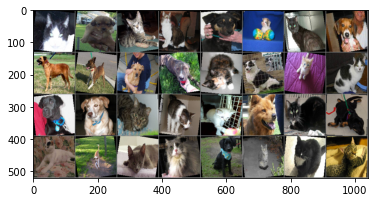

In [4]:
# Utility Function for Visualization
# This function will take a PyTorch image tensor, unnormalize it back to displayable pixel values,
# convert it to a NumPy array, transpose its dimensions for proper display, and finally show the image using matplotlib.
def imshow(img):
    img = img / 2 + 0.5  # unnormalize the image: reverse the normalization that scales pixels to the range [-1, 1]
    npimg = img.numpy()  # convert the PyTorch tensor into a NumPy array for further processing by matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # transpose the dimensions from (C, H, W) to (H, W, C) for proper display
    plt.show()  # display the image in a matplotlib window

# Display a batch of training images
dataiter = iter(train_loader)  # create an iterator from the train_loader to loop over batches of training data
images, labels = next(dataiter)  # get the next batch from the iterator, which includes a set of images and their labels
imshow(torchvision.utils.make_grid(images))  # create a grid of images from the batch and display it using the imshow function
print(' '.join('%5s' % train_dataset.classes[labels[j]] for j in range(8)))  # print the class names 
                                                                       # for the first 8 images in the batch with proper formatting

### Define CNN Architecture
Define a Convolutional Neural Network (CNN) using torch.nn.Module to classify images into 'dog' or 'cat'. Include layers such as convolutional, pooling, and fully connected layers.

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()  # Call the __init__ method of the parent class (nn.Module) to initialize the module.
        
        # Convolutional layers with BatchNorm
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Create a conv2d layer: 3 input channels, 32 output channels, 3x3 kernel, padding=1 to retain spatial size.
        self.bn1 = nn.BatchNorm2d(32)  # Create a batch normalization layer for 32 channels produced by conv1.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Create a conv2d layer: taking input from 32 channels and producing 64 channels, kernel size 3x3 with padding.
        self.bn2 = nn.BatchNorm2d(64)  # Create a batch normalization layer for the 64 channels output from conv2.
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Create a conv2d layer: input 64 channels, output 128 channels, kernel size 3x3 with padding.
        self.bn3 = nn.BatchNorm2d(128)  # Create a batch normalization layer for the 128 channels produced by conv3.
        self.pool = nn.MaxPool2d(2, 2)  # Define a max pooling layer with a 2x2 window and a stride of 2 to downsample spatial dimensions.
        self.dropout = nn.Dropout(0.25)  # Define a dropout layer with a dropout probability of 25% to reduce overfitting.
        
        # For a 128x128 input and 3 poolings, the spatial dimensions become: 128 -> 64 -> 32 -> 16.
        self.fc1 = nn.Linear(128 * 16 * 16, 512)  # Create a fully connected (linear) layer: flatten conv output (128 channels * 16 * 16 spatial size) to 512 features.
        self.bn_fc = nn.BatchNorm1d(512)  # Apply batch normalization to the 512 features from fc1.
        self.fc2 = nn.Linear(512, 2)  # Create the output layer mapping 512 features to 2 classes.

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))  # Pass input through conv1, then bn1, then apply ReLU activation.
        x = self.pool(x)  # Downsample the result with max pooling.
        x = F.relu(self.bn2(self.conv2(x)))  # Pass through conv2, bn2, and ReLU activation.
        x = self.pool(x)  # Downsample with max pooling.
        x = F.relu(self.bn3(self.conv3(x)))  # Process through conv3, bn3, and ReLU activation.
        x = self.pool(x)  # Downsample with max pooling.
        # Flatten the tensor
        x = x.view(x.size(0), -1)  # Reshape tensor into (batch_size, flattened_features) for the fully connected layers.
        x = self.dropout(x)  # Apply dropout to the flattened tensor for regularization.
        x = F.relu(self.bn_fc(self.fc1(x)))  # Pass the data through fc1, normalize with bn_fc and apply ReLU activation.
        x = self.dropout(x)  # Apply dropout again to the fully connected output.
        x = self.fc2(x)  # Pass through the final output layer to generate class scores.
        return x  # Return the computed output logits.

# Instantiate and display the model
net = Net()  # Create an instance of the Net class to build the CNN.
print(net)  # Print the model architecture details.

 cats  dogs  cats  cats  dogs  cats  cats  dogs


### Train the Model
Implement the training loop including forward pass, loss calculation, backpropagation, and updates using an optimizer. Print training progress and loss values. This step will take 15 minutes or more

In [6]:
criterion = nn.CrossEntropyLoss()  # Define the loss function using Cross Entropy Loss, which measures the performance of a classification model by comparing the predicted class scores to the true class labels.
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)  # Initialize the Adam optimizer to update the network parameters; the learning rate is set to 0.001.
n_epochs = 20  # Increase epochs to allow for better convergence, so that the network can learn from the training data over multiple passes.

# Training Loop
for epoch in range(n_epochs):  # Loop through the training process for the defined number of epochs.
    running_loss = 0.0  # Initialize a variable to accumulate the loss over each batch within the current epoch.
    net.train()  # Ensure the model is in training mode; this activates layers like dropout and batch normalization appropriately.
    for i, (inputs, labels) in enumerate(train_loader, 0):  # Iterate over the dataloader to fetch batches of input data and corresponding labels.
        optimizer.zero_grad()  # Reset the gradients of model parameters to zero before backpropagation to prevent gradient accumulation.
        outputs = net(inputs)  # Forward pass: feed the input data through the network to obtain the predicted outputs.
        loss = criterion(outputs, labels)  # Compute the loss by comparing the network output with the true labels using the defined loss function.
        loss.backward()  # Backpropagation: calculate the gradient of the loss with respect to each model parameter.
        optimizer.step()  # Update model parameters using the gradients computed during backpropagation.
        running_loss += loss.item()  # Add the loss value of the current batch to the running loss for the epoch.
    
    avg_loss = running_loss / len(train_loader)  # Calculate the average loss over all batches in the current epoch.
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {avg_loss:.3f}")  # Print the epoch number and average loss to monitor training progress.

print('Finished Training')  # Print a message indicating that the training loop has completed.



Epoch [1/20], Loss: 0.780
Epoch [2/20], Loss: 0.557
Epoch [3/20], Loss: 0.515
Epoch [4/20], Loss: 0.463
Epoch [5/20], Loss: 0.430
Epoch [6/20], Loss: 0.439
Epoch [7/20], Loss: 0.382
Epoch [8/20], Loss: 0.348
Epoch [9/20], Loss: 0.371
Epoch [10/20], Loss: 0.355
Epoch [11/20], Loss: 0.304
Epoch [12/20], Loss: 0.282
Epoch [13/20], Loss: 0.266
Epoch [14/20], Loss: 0.248
Epoch [15/20], Loss: 0.232
Epoch [16/20], Loss: 0.248
Epoch [17/20], Loss: 0.198
Epoch [18/20], Loss: 0.187
Epoch [19/20], Loss: 0.137
Epoch [20/20], Loss: 0.171
Finished Training


### Evaluate on Test Data
Run the trained model on the test dataset to evaluate its performance. Compute accuracy and display the confusion matrix if needed.

In [7]:
# Evaluation on Test Data  # This section computes model performance on the test dataset.
net.eval()  # Set model to evaluation mode; this disables dropout, batch normalization, and other training-specific behaviors.
all_preds = []  # Initialize an empty list to store the predicted labels for all batches.
all_labels = []  # Initialize an empty list to store the true labels for all batches.

with torch.no_grad():  # Disable gradient computation to improve performance and reduce memory usage during evaluation.
    for images, labels in test_loader:  # Iterate over each batch, where images are the input tensors and labels are the true labels.
        outputs = net(images)  # Perform a forward pass through the network to get output logits for the current batch.
        _, predicted = torch.max(outputs, 1)  # Compute the index of the max logit for each image to determine the predicted class.
        all_preds.extend(predicted.cpu().numpy())  # Convert predicted tensor to CPU numpy array and extend the all_preds list.
        all_labels.extend(labels.cpu().numpy())  # Convert true labels to CPU numpy array and extend the all_labels list.

accuracy = accuracy_score(all_labels, all_preds)  # Calculate the accuracy metric by comparing true labels with predictions.
print(f'Accuracy on test data: {accuracy * 100:.2f}%')  # Print out the accuracy percentage formatted to two decimal places.



Accuracy on test data: 72.50%


### Make Predictions on New Images
Load new images, apply the same transforms, and then use the trained model to predict whether the images are dogs or cats. Display the predicted labels along with the images.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


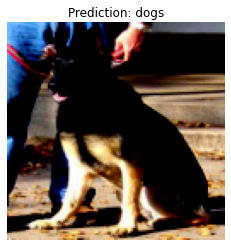

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


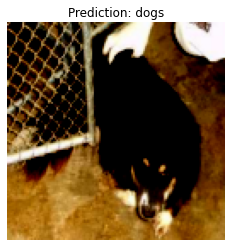

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


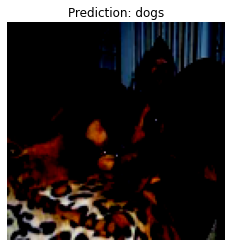

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


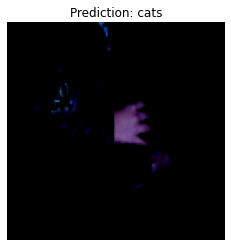

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


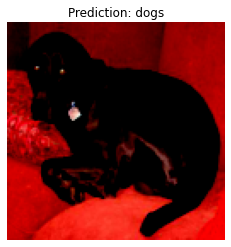

In [12]:
# Import the 'random' module to generate random numbers, which will be used to select random indices from the test dataset.
import random

# Set the network in evaluation mode to disable dropout and batch normalization updates.
net.eval()  # set model to evaluation mode

# Loop 5 times to make predictions on 5 random images from the test dataset.
for _ in range(5):
    # Randomly select an index between 0 and the size of test_dataset - 1.
    idx = random.randint(0, len(test_dataset) - 1)
    # Retrieve the image and its true label from the test dataset at the randomly selected index.
    image, true_label = test_dataset[idx]
    
    # Temporarily disable gradient calculation to improve inference speed and reduce memory usage.
    with torch.no_grad():
        # Unsqueeze the image tensor to add a batch dimension and pass it through the network to get output logits.
        output = net(image.unsqueeze(0))
        # Determine the predicted class by finding the index with the maximum logit; convert to int.
        pred = int(torch.argmax(output, 1).item())
    
    # Create a new matplotlib figure for displaying the image.
    plt.figure()
    # Convert the image tensor to a NumPy array, transpose its dimensions from (C, H, W) to (H, W, C),
    # and display the image.
    plt.imshow(np.transpose(image.numpy(), (1, 2, 0)))
    # Set the title of the plot with the predicted class name; original comment is kept.
    plt.title(f'Prediction: {train_dataset.classes[pred]}')
    # Remove the axis ticks and labels from the plot.
    plt.axis('off')
    # Render the plot to display the image along with the title.
    plt.show()